<a href="https://colab.research.google.com/github/jessikamorais/FIAP/blob/main/projeto_modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Síndrome da Fadiga Crônica (EM/SFC) e Depressão

### Fonte de Dados:

O conjunto de dados utilizado é sintetíco, desenvolvimendo para tarefas de classificação entre Encefalomielite Miálgica/Síndrome da Fadiga Crônica (EM/SFC) e Depressão.

Este é o primeiro conjunto de dados desse tipo criado especificamente para ajudar iniciantes e pesquisadores a explorar casos complexos de diagnóstico diferencial em condições de saúde mental e crônica.

(Falar sobre as duas doenças de forma breve, falar da importância do estudo das mesmas e como elas afetam as pessoas no mundo atual).

# **Explicação das variáveis:**

* **age** -	Idade do paciente
* **gender** -	Genêro (Feminino / Masculino / Outro)
* **fatigue_severity_scale_score** -	Escala de Gravidade da Fadiga (Fatigue Severity Scale - FSS), 0–10
* **depression_phq9_score** -	PHQ-9 Índice de depressão, 0–27
* **pem_present	Whether** - Mal-estar pós-esforço está presente (Post-Exertional Malaise - PEM) is present (Yes/No or 1/0)
* **pem_duration_hours** -	Duração do mal-estar pós-esforço (PEM) em horas
* **sleep_quality_index** -	Qualidade do sono (escala de 1 à 10)
* **brain_fog_level** -	Névoa cerebral (1–10)
* **physical_pain_score** -	Intesidade da dor física (1–10)
* **stress_level** - Nível de estresse (1–10)
* **work_status** -	Status de trabalho: Trabalhando / Trabalho parcial / Sem trabalho
* **social_activity_level** - Atividade social: Muito baixa – Muito alta
* **exercise_frequency** - Frequência de atividade física: Nunca – Diariamente
* **meditation_or_mindfulness** - O paciente pratica mindfulness ou meditação? Sim / NãoDoes the patient practice mindfulness or meditation? Yes/No
* **hours_of_sleep_per_night** - Duração média do sono por noite
* **diagnosis** - Diagnóstico (qual doença o paciente tem, ou possui ambas): ME/CFS, Depressão, Ambos (Variável Target)

# **`Importando as bibliotecas`**

In [42]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score #métrica de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
from sklearn.preprocessing import OrdinalEncoder #TESTE PARA ORDENAÇÃO DE DADOS CATEGÓRICOS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# **Importando os dados**

In [2]:
data = pd.read_csv('me_depression_data.csv', sep=',')

# **Analisando os dados**

A base de dados utilizada possui umas dimensão de 16 colunas e 1000 linhas de informação. Com dados numéricos e categóricos.

In [3]:
data.shape

(1000, 16)

In [4]:
data.head(5)

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


In [5]:
data.describe()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
count,1000.000000,953.000000,952.000000,966.000000,952.000000,978.000000,979.000000,976.000000,979.000000,1000.000000
mean,44.385000,5.468625,5.611765,5.521843,5.459139,12.268916,6.407252,23.105533,6.571297,0.599000
std,15.321669,2.571423,2.649316,2.565460,2.566536,6.306588,2.206937,13.823953,2.040320,0.490346
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,31.750000,3.100000,3.300000,3.325000,3.300000,9.000000,6.300000,11.000000,4.800000,0.000000
50%,45.000000,5.600000,5.800000,5.600000,5.400000,10.000000,7.000000,23.000000,6.600000,1.000000
75%,57.000000,7.700000,7.900000,7.800000,7.700000,16.000000,7.500000,35.000000,8.350000,1.000000
max,70.000000,10.000000,10.000000,10.000000,10.000000,27.000000,10.000000,47.000000,10.000000,1.000000


In [6]:
diagnosis_map = {'1':'Depression',
         '2':'ME/CFS',
         '3':'Both'}

In [7]:
diagnosis_map['1'], diagnosis_map['2'], diagnosis_map['3']

('Depression', 'ME/CFS', 'Both')

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(42.0, 0.5, 'Depression PHQ9 Score')]

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 64.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


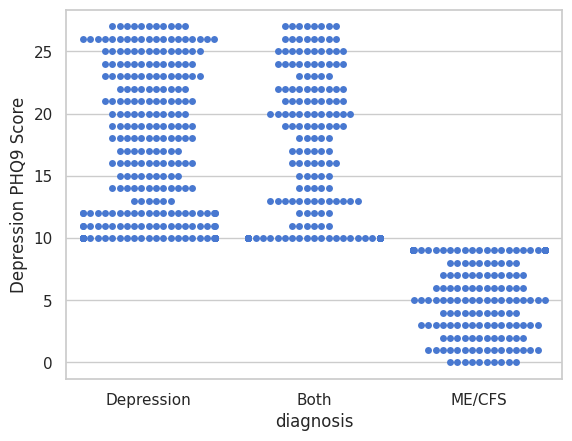

In [8]:
sns.set_theme(style="whitegrid", palette="muted")

ax = sns.swarmplot(data=data, x="diagnosis", y="depression_phq9_score")
ax.set(ylabel="Depression PHQ9 Score")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

Pode se observar que as únicas variáveis que não possuem valores nulos são: "age", "gender", "pem_present" e "diagnosis", possuindo 1000 linhas de informações preenchidas (não nulas).
As demais variáveis posssuem valores nulos, que devem ser tratados no decorrer do projeto.

As variáveis: "gender", "work_status", "social_activity_level", exercise_frequency", "meditation_e_mindfulness", "diagnosis", são variáveis do tipo texto. Analisando estas variáveis uma de cada vez:

Variável: "**gender**"

In [10]:
set(data["gender"])

{'Female', 'Male'}

In [11]:
data["gender"].value_counts()

,count
gender,
Male,524
Female,476


Variável: "**work_status**"

In [12]:
set(data["work_status"])

{'Not working', 'Partially working', 'Working', nan}

In [13]:
data["work_status"].value_counts()

,count
work_status,
Partially working,335
Working,320
Not working,298


Variável: "**social_activity_level**"

In [14]:
set(data["social_activity_level"])

{'High', 'Low', 'Medium', 'Very high', 'Very low', nan}

In [15]:
data["social_activity_level"].value_counts()

,count
social_activity_level,
Very low,203
High,200
Low,190
Very high,186
Medium,181


Analisando a quantidade de valores "nan" na variável:

In [16]:
data["social_activity_level"].isna().sum()
data[data["social_activity_level"].isna()].index

Index([  2,  39,  61,  69, 113, 129, 136, 141, 143, 147, 155, 179, 185, 200,
       201, 256, 267, 307, 319, 325, 328, 383, 408, 421, 428, 489, 521, 522,
       573, 634, 709, 735, 768, 787, 850, 851, 868, 967, 980, 988],
      dtype='int64')

Variável: "**exercise_frequency**"

In [17]:
set(data["exercise_frequency"])

{'Daily', 'Never', 'Often', 'Rarely', 'Sometimes', nan}

In [18]:
data["exercise_frequency"].value_counts()

,count
exercise_frequency,
Rarely,210
Often,202
Daily,194
Sometimes,184
Never,171


In [19]:
data["exercise_frequency"].isna().sum()
data[data["social_activity_level"].isna()].index

Index([  2,  39,  61,  69, 113, 129, 136, 141, 143, 147, 155, 179, 185, 200,
       201, 256, 267, 307, 319, 325, 328, 383, 408, 421, 428, 489, 521, 522,
       573, 634, 709, 735, 768, 787, 850, 851, 868, 967, 980, 988],
      dtype='int64')

Variável: "**meditation_or_mindfulness**"

In [20]:
set(data["meditation_or_mindfulness"])

{'No', 'Yes', nan}

In [21]:
data["meditation_or_mindfulness"].value_counts()

,count
meditation_or_mindfulness,
Yes,505
No,484


In [22]:
data["meditation_or_mindfulness"].isna().sum()

np.int64(11)

Variável: "**diagnosis**"

In [23]:
set(data["diagnosis"])

{'Both', 'Depression', 'ME/CFS'}

In [24]:
data["diagnosis"].value_counts()

,count
diagnosis,
Depression,401
ME/CFS,397
Both,202


Analisando as variáveis do **tipo numerico**: VERIFICAR SE É PRECISO ESTA ETAPA, AS VEZES PODE COLOCAR QUE AS VARIÁVEIS CATEGORICAS FORAM ANALISADAS UMA A UMA PARA MOSTRAR O QUE HAVIA DENTRO DE CADA UMA

# **Tratando inconsistências na base**

Transformando os valores "nan" nos dados categóricos em "unknown":

In [25]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data.isna().sum()

,0
gender,0
work_status,47
social_activity_level,40
exercise_frequency,39
meditation_or_mindfulness,11
diagnosis,0


In [26]:
categorical_data.fillna("Unknown", inplace=True)
categorical_data.isna().sum()

,0
gender,0
work_status,0
social_activity_level,0
exercise_frequency,0
meditation_or_mindfulness,0
diagnosis,0


Transformando os valores do tipo categórico para numérico utilizando a técnica de Label Enconding sem definir a ordem dos valores para cada variável:

In [27]:
categorical_data_encoded = categorical_data.copy()
for col in categorical_data_encoded.columns:
    if categorical_data_encoded[col].dtype == 'object':
        le = LabelEncoder()
        categorical_data_encoded[col] = le.fit_transform(categorical_data_encoded[col])

display(categorical_data_encoded.head())

,gender,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,1,3,1,0,2,1
1,1,3,1,2,2,0
2,0,1,3,3,2,1
3,0,0,0,1,2,1
4,0,0,1,3,0,0


Verificando a quantidade de valores numéricos nulos e adicionando o valor "zero":

In [28]:
numerical_data = data.select_dtypes(include=[np.number])
numerical_data.isnull().sum()

,0
age,0
sleep_quality_index,47
brain_fog_level,48
physical_pain_score,34
stress_level,48
depression_phq9_score,22
fatigue_severity_scale_score,21
pem_duration_hours,24
hours_of_sleep_per_night,21
pem_present,0


In [29]:
numerical_data.fillna("0", inplace=True)
numerical_data.isnull().sum()

/tmp/ipython-input-29-2852103615.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  numerical_data.fillna("0", inplace=True)


,0
age,0
sleep_quality_index,0
brain_fog_level,0
physical_pain_score,0
stress_level,0
depression_phq9_score,0
fatigue_severity_scale_score,0
pem_duration_hours,0
hours_of_sleep_per_night,0
pem_present,0


Juntando toda a base de dados:

In [38]:
treated_data = pd.concat([numerical_data, categorical_data_encoded], axis=1)
display(treated_data.head())
treated_data.info()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,gender,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,1,3,1,0,2,1
1,69,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,1,3,1,2,2,0
2,46,4.0,5.4,4.8,0,24.0,1.6,13.0,6.9,0,0,1,3,3,2,1
3,32,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,0,0,0,1,2,1
4,60,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,0,0,1,3,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           1000 non-null   int64 
 1   sleep_quality_index           1000 non-null   object
 2   brain_fog_level               1000 non-null   object
 3   physical_pain_score           1000 non-null   object
 4   stress_level                  1000 non-null   object
 5   depression_phq9_score         1000 non-null   object
 6   fatigue_severity_scale_score  1000 non-null   object
 7   pem_duration_hours            1000 non-null   object
 8   hours_of_sleep_per_night      1000 non-null   object
 9   pem_present                   1000 non-null   int64 
 10  gender                        1000 non-null   int64 
 11  work_status                   1000 non-null   int64 
 12  social_activity_level         1000 non-null   int64 
 13  exercise_frequency 

In [39]:
treated_data.shape

(1000, 16)

<Axes: xlabel='age'>

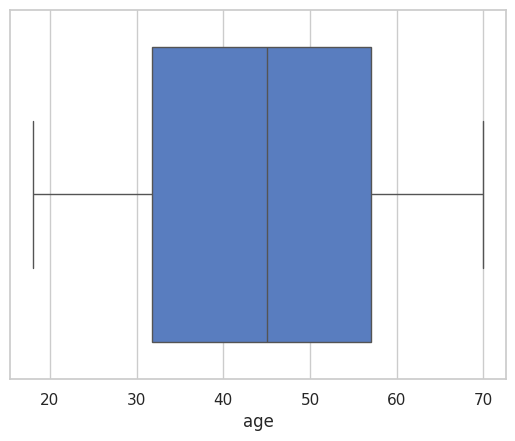

In [31]:
sns.boxplot(x=data["age"])

<Axes: xlabel='age', ylabel='Count'>

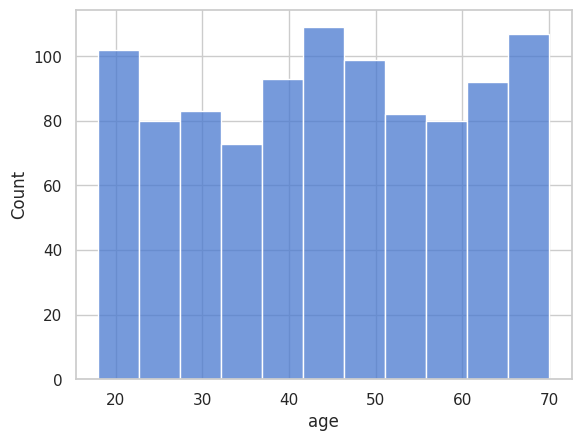

In [32]:
sns.histplot(data=data, x="age")

<Axes: >

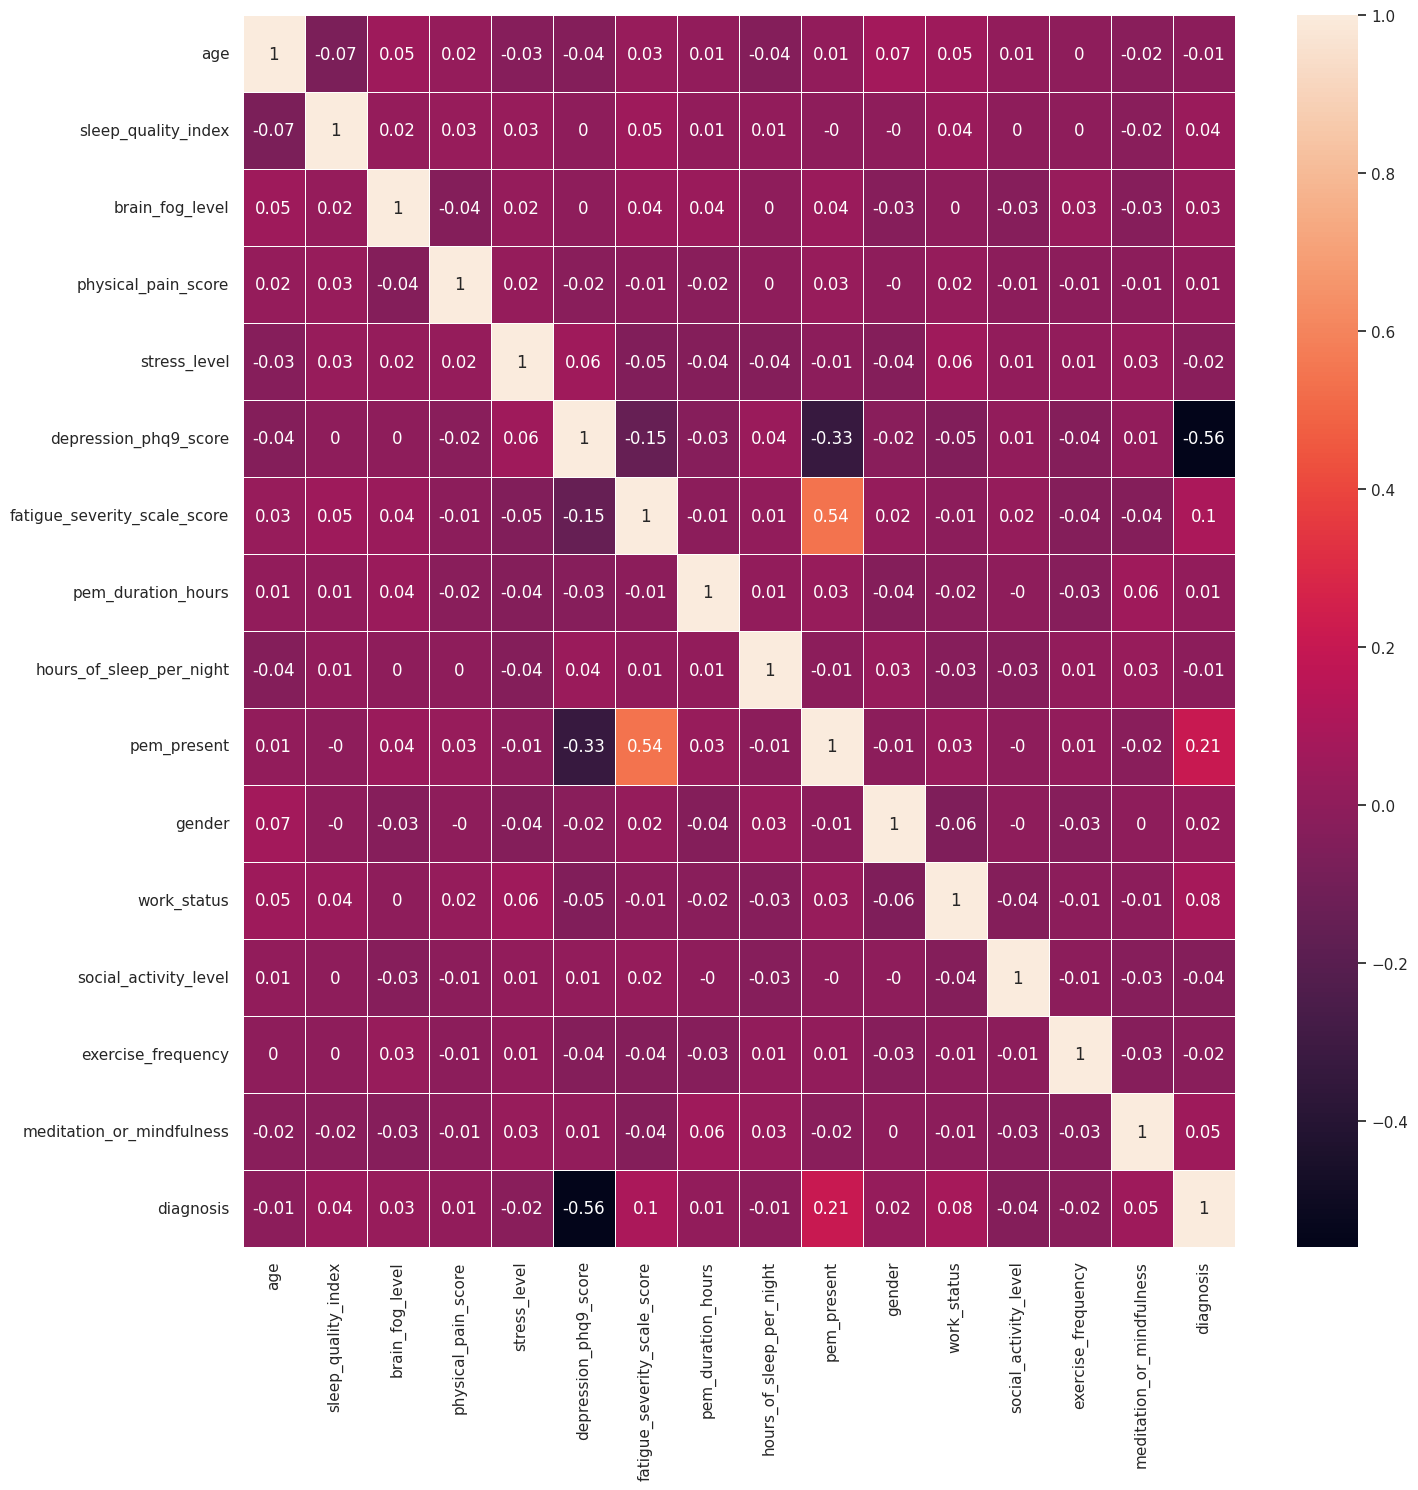

In [33]:
#NÃO SEI SE FAZ SENTIDO PARA EM CASOS DE CLASSIFICAÇÃO E NÃO REGRESSÃO
correlation_matrix = treated_data.corr().round(2)

fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

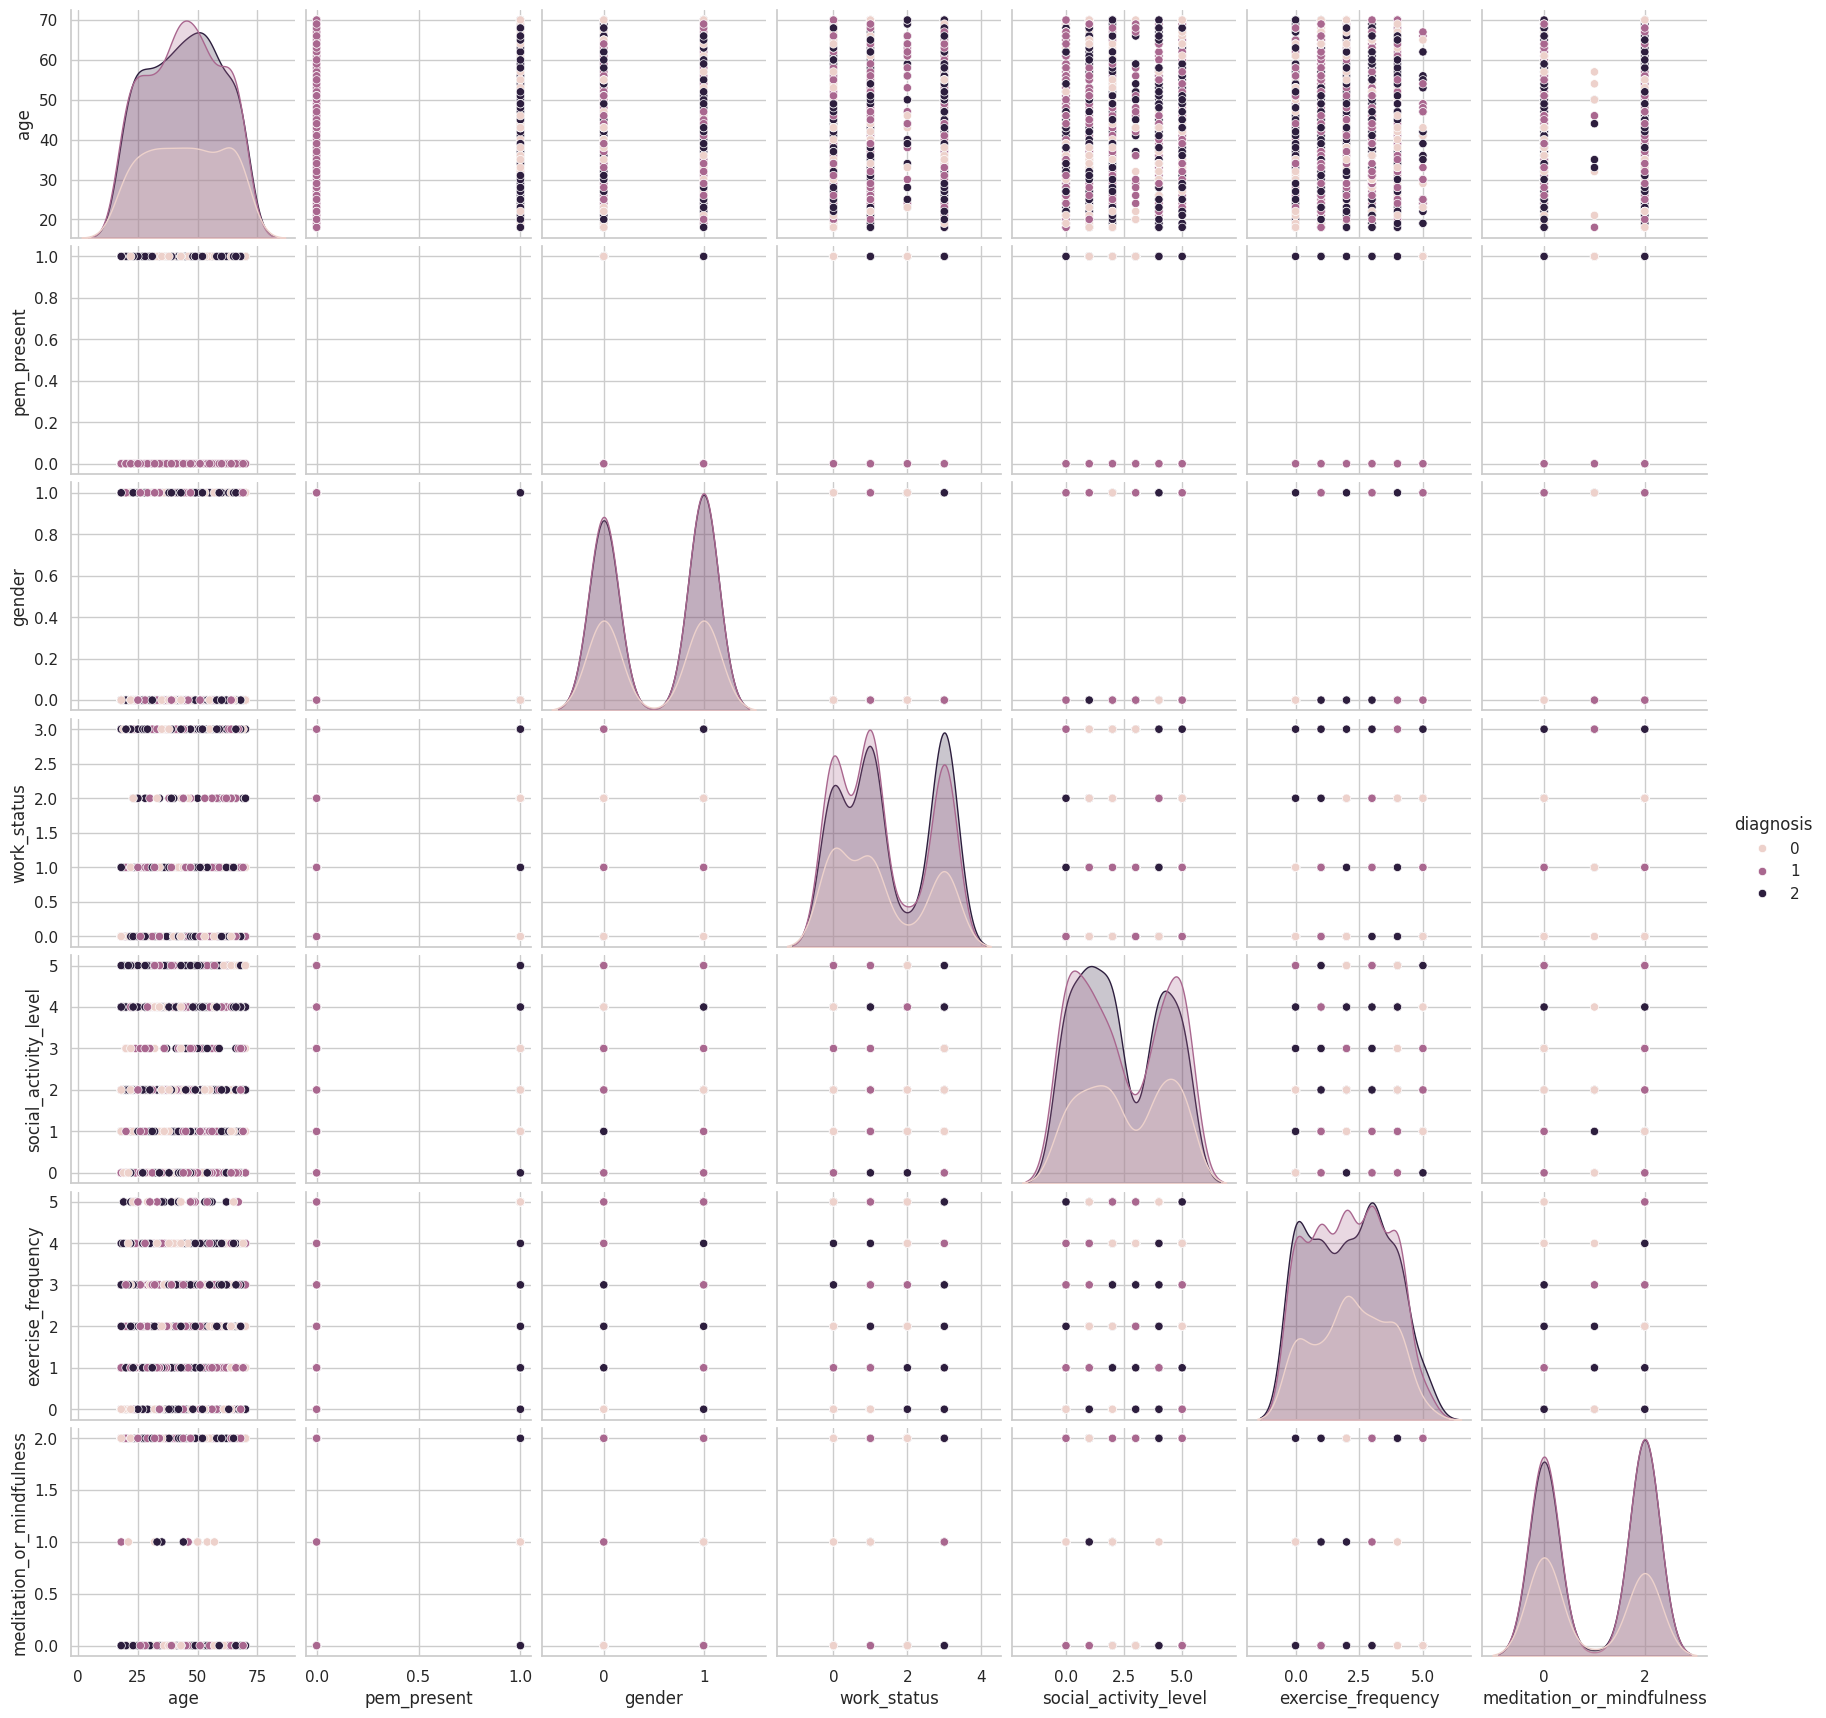

In [40]:
sns.pairplot(treated_data, hue="diagnosis")
plt.show()

# **Análise exploratória dos dados**

# **Criação dos modelos de Machine Learning**

**Separação da base de treino e de teste**

In [50]:
x = treated_data.drop("diagnosis", axis=1)
y = treated_data["diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_lr =  LogisticRegression(max_iter=2000)
model_lr.fit(x_train, y_train)

predictions_lr = model_lr.predict(x_test)

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        39
           1       1.00      0.99      0.99        83
           2       0.86      1.00      0.92        78

    accuracy                           0.94       200
   macro avg       0.95      0.89      0.91       200
weighted avg       0.94      0.94      0.93       200



In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_lr)
print(cm)

[[27  0 12]
 [ 0 82  1]
 [ 0  0 78]]


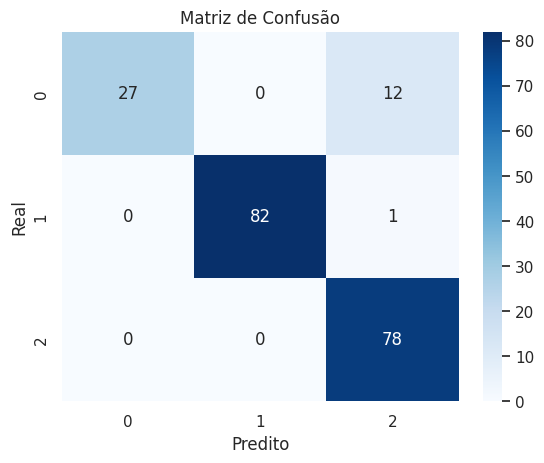

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

for model_name, model_class in classifiers:
  model = model_class
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)

  print(f"Acurácia do modelo {model_name}: {accuracy}")

Acurácia do modelo Decision Tree: 0.99
Acurácia do modelo Random Forest: 0.995
Acurácia do modelo AdaBoost: 0.995
Acurácia do modelo Gradient Boosting: 0.995
Acurácia do modelo K-Nearest Neighbors: 0.58
Acurácia do modelo AdaBoost: 0.995
Acurácia do modelo Naive Bayes: 0.925
